In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region'],axis=1)
df2

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases
0,2020-01-22,Afghanistan,0,0,0,0,0
1,2020-01-22,Albania,0,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0,0
4,2020-01-22,Angola,0,0,0,0,0
...,...,...,...,...,...,...,...
27297,2020-06-15,West Bank and Gaza,505,3,415,87,13
27298,2020-06-15,Western Sahara,9,1,8,0,0
27299,2020-06-15,Yemen,844,208,79,557,116
27300,2020-06-15,Zambia,1382,11,1142,229,24


In [3]:
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2.drop(['Date'],axis=1,inplace=True)
dfindia = df2[df2['Country/Region']==79]
X = dfindia.drop(['New cases'],axis=1)
Y = dfindia['New cases']
X.drop(['Country/Region'],axis=1,inplace=True)

In [4]:
X,Y

(       Confirmed  Deaths  Recovered  Active  Year  Month  Day
 79             0       0          0       0  2020      1   22
 266            0       0          0       0  2020      1   23
 453            0       0          0       0  2020      1   24
 640            0       0          0       0  2020      1   25
 827            0       0          0       0  2020      1   26
 ...          ...     ...        ...     ...   ...    ...  ...
 26446     297535    8498     147195  141842  2020      6   11
 26633     308993    8884     154330  145779  2020      6   12
 26820     320922    9195     162379  149348  2020      6   13
 27007     332424    9520     169798  153106  2020      6   14
 27194     343091    9900     180013  153178  2020      6   15
 
 [146 rows x 7 columns],
 79           0
 266          0
 453          0
 640          0
 827          0
          ...  
 26446    10930
 26633    11458
 26820    11929
 27007    11502
 27194    10667
 Name: New cases, Length: 146, dtype: int

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
regressor.score(X_test,Y_test)

0.992698876095593

In [8]:
y_pred_india = regressor.predict(X)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_india})
dataframe

,Actual Value,Predicted
79,0,-113.355409
266,0,-110.555254
453,0,-107.755099
640,0,-104.954944
827,0,-102.154788
...,...,...
26446,10930,11183.186106
26633,11458,11365.276366
26820,11929,11584.633450
27007,11502,11807.583441


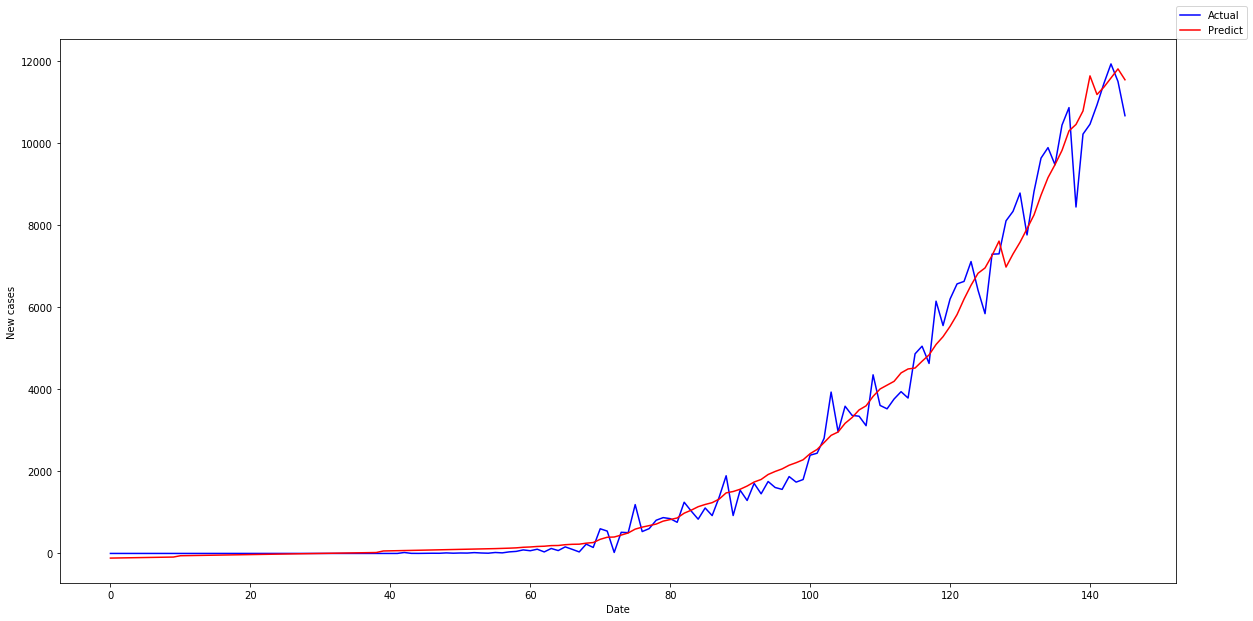

In [9]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [11]:
model.score(X_test,Y_test)

0.9941606192825015

In [12]:
y_pred_india = model.predict(X)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_india})
dataframe

,Actual Value,Predicted
79,0,0.00
266,0,0.00
453,0,0.00
640,0,0.00
827,0,0.00
...,...,...
26446,10930,10956.83
26633,11458,11438.62
26820,11929,11704.18
27007,11502,11474.00


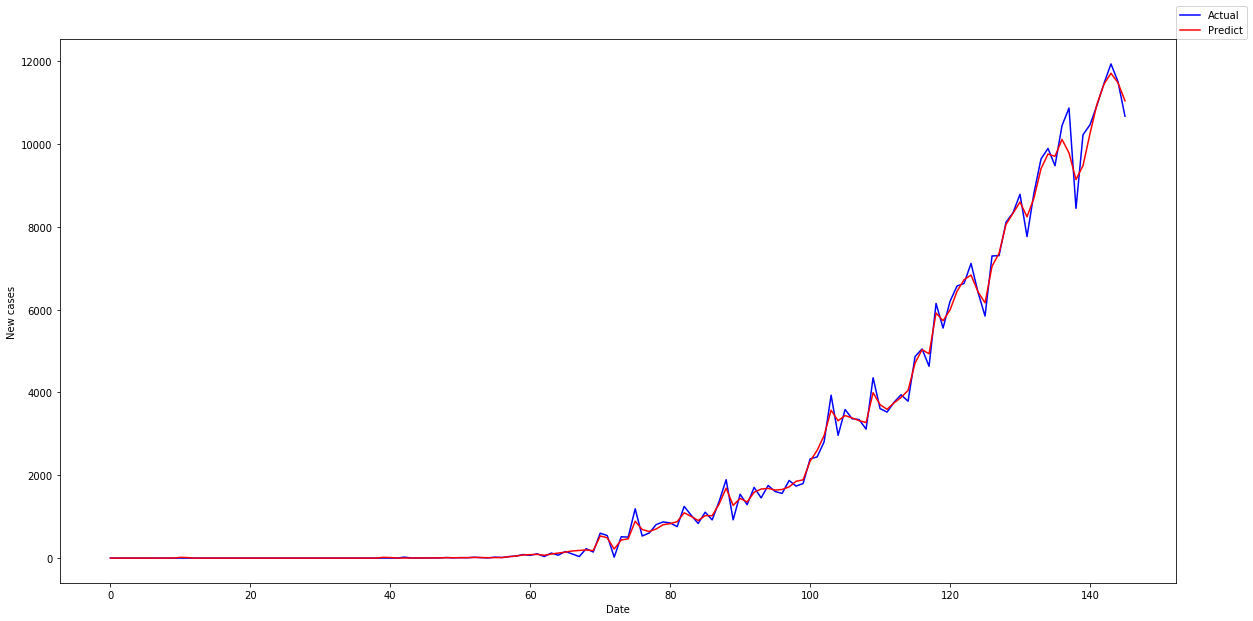

In [13]:
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lin_reg2.score(X_poly,Y)

0.9934463610632722

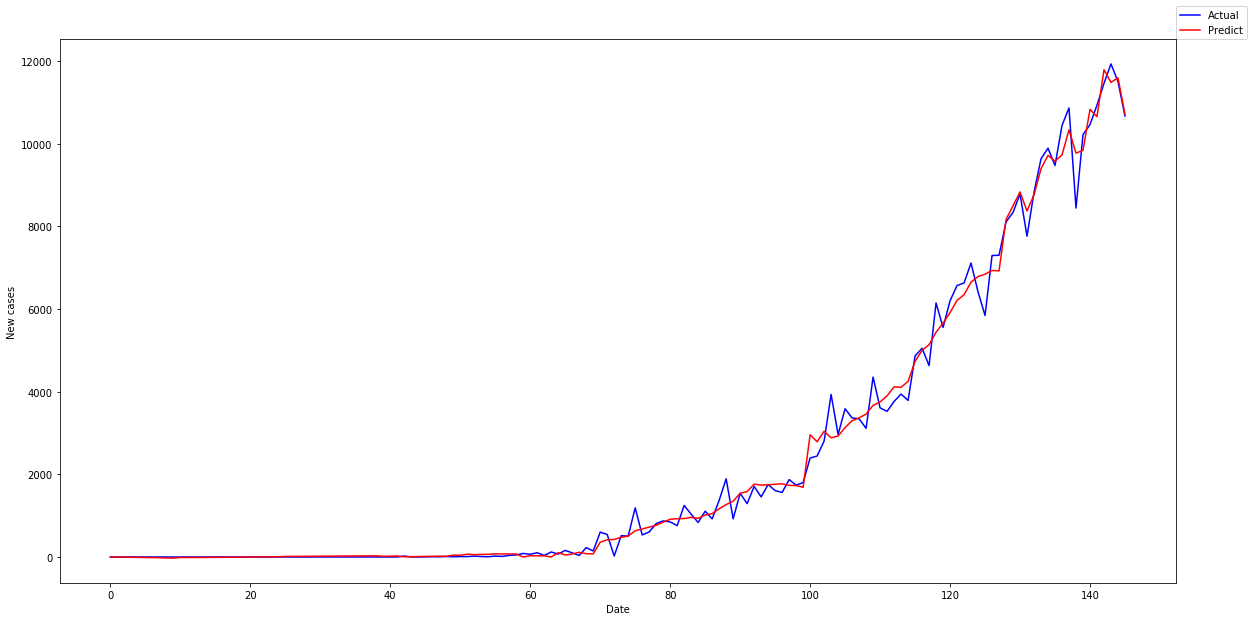

In [17]:
y_pred_india = lin_reg2.predict(X_poly)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_india})
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

# Overfitting

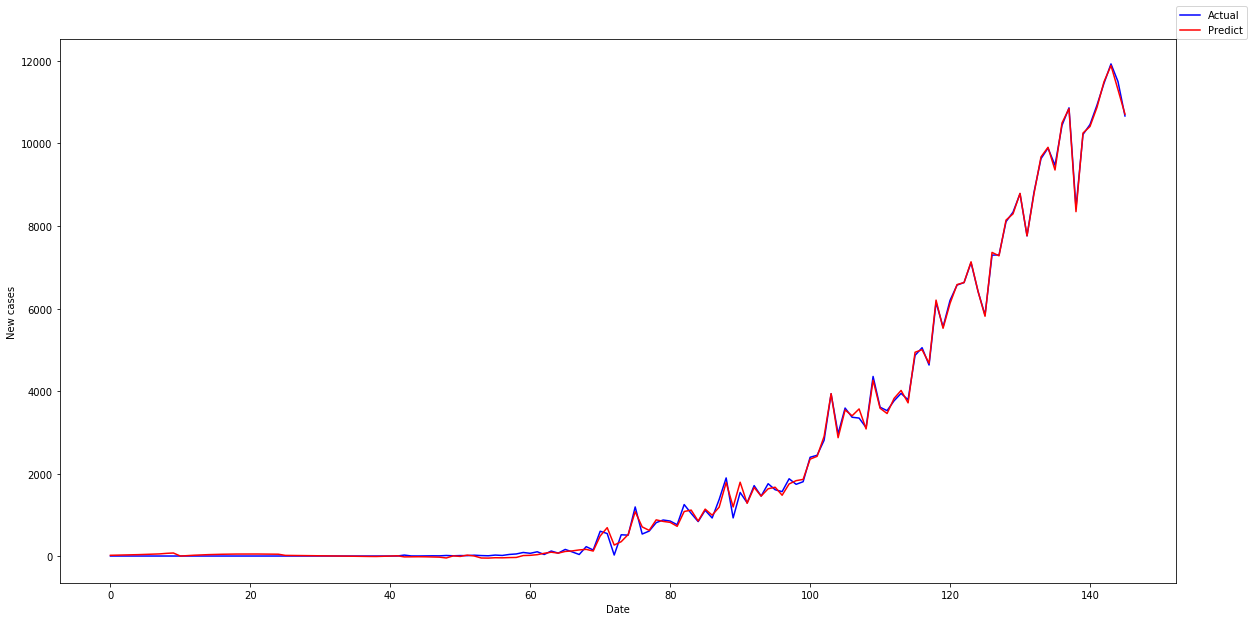

In [18]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)
y_pred_india = lin_reg2.predict(X_poly)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_india})
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

In [19]:
df = pd.read_csv('full_grouped.csv')
df2 = df.drop(['New deaths','New recovered','WHO Region'],axis=1)

In [20]:
df2['Country/Region'] = pd.factorize(df2['Country/Region'])[0]
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day
df2.drop(['Date'],axis=1,inplace=True)
dfchina = df2[df2['Country/Region']==36]
X = dfchina.drop(['New cases'],axis=1)
Y = dfchina['New cases']
X.drop(['Country/Region'],axis=1,inplace=True)

In [21]:
X,Y

(       Confirmed  Deaths  Recovered  Active  Year  Month  Day
 36           548      17         28     503  2020      1   22
 223          643      18         30     595  2020      1   23
 410          920      26         36     858  2020      1   24
 597         1406      42         39    1325  2020      1   25
 784         2075      56         49    1970  2020      1   26
 ...          ...     ...        ...     ...   ...    ...  ...
 26403      84216    4638      79464     114  2020      6   11
 26590      84228    4638      79472     118  2020      6   12
 26777      84286    4638      79475     173  2020      6   13
 26964      84335    4638      79482     215  2020      6   14
 27151      84378    4638      79489     251  2020      6   15
 
 [146 rows x 7 columns],
 36         0
 223       95
 410      277
 597      486
 784      669
         ... 
 26403      7
 26590     12
 26777     58
 26964     49
 27151     43
 Name: New cases, Length: 146, dtype: int64)

# Underfitting

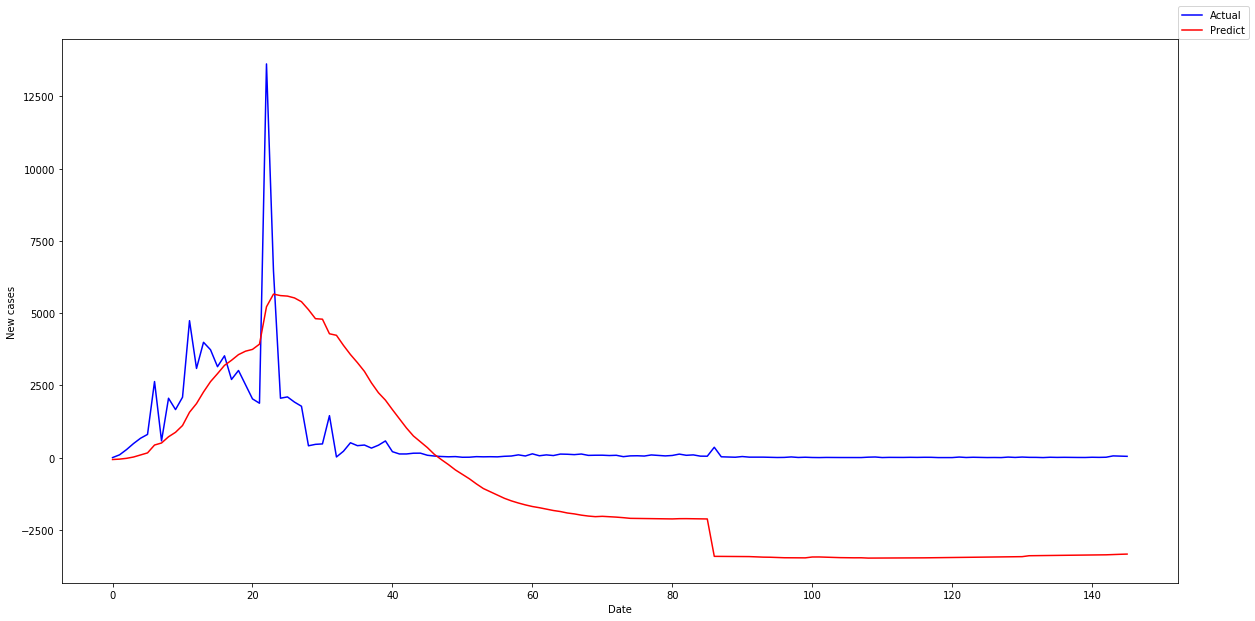

In [22]:
y_pred_china = regressor.predict(X)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_china})
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

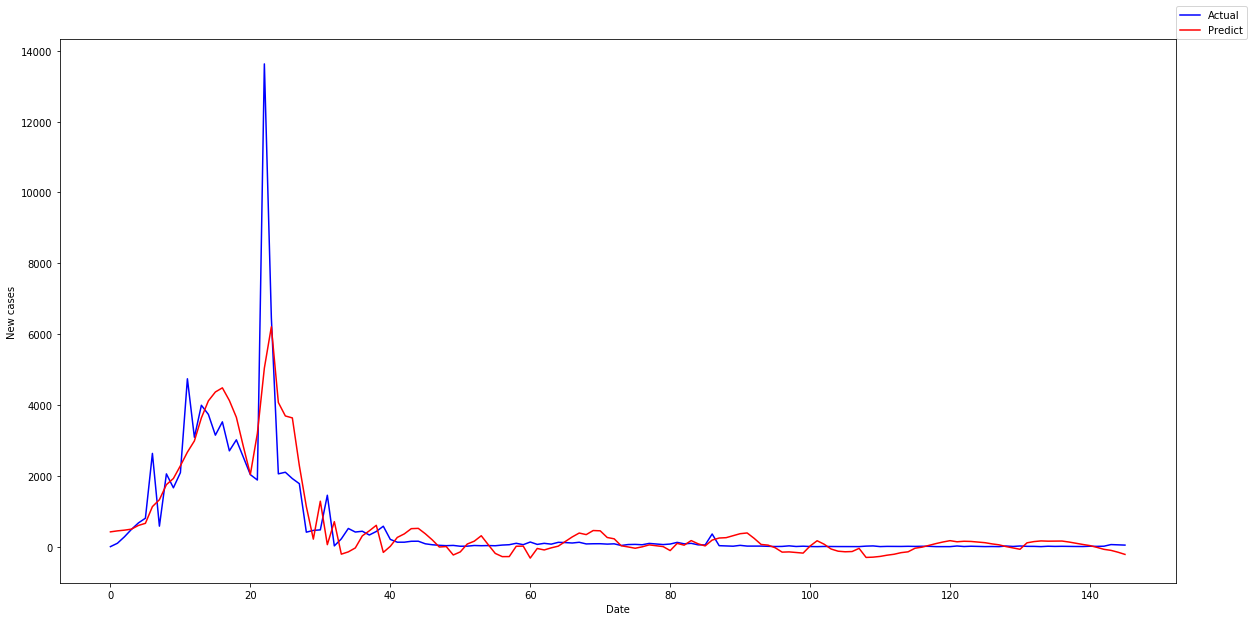

In [23]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly,Y)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,Y)
y_pred_china = lin_reg2.predict(X_poly)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_china})
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));

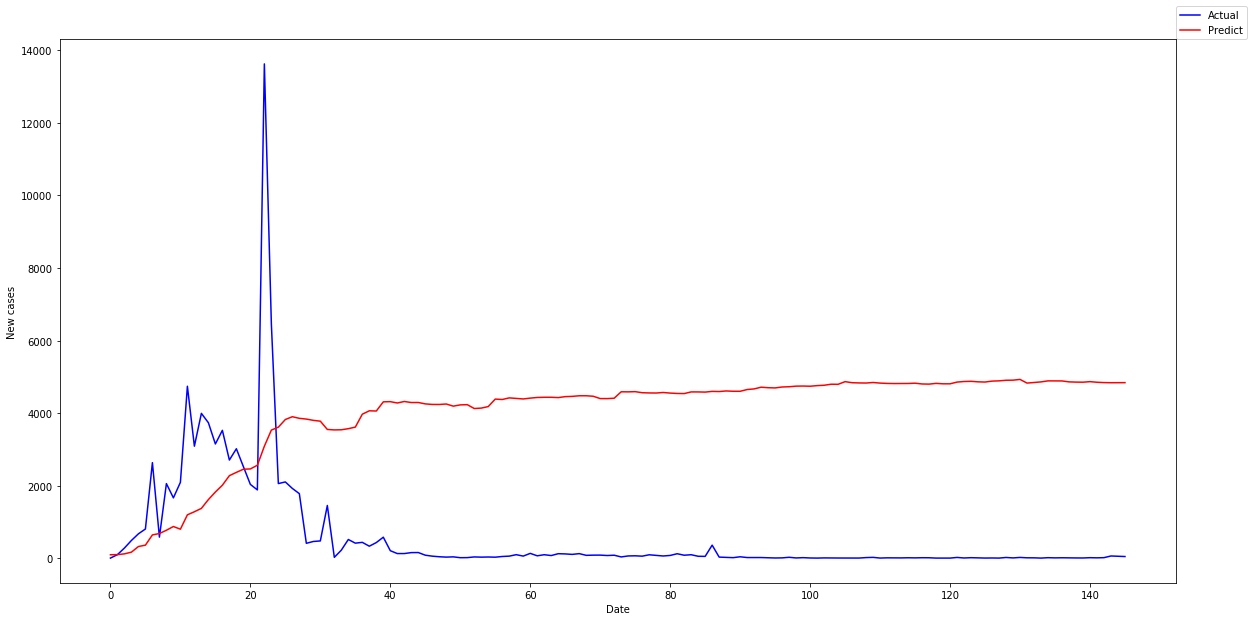

In [24]:
y_pred_china = model.predict(X)
dataframe = pd.DataFrame({'Actual Value':Y,'Predicted':y_pred_china})
fig , ax = plt.subplots(figsize=(20,10))
val = np.arange(0,len(dataframe),1)
ax.plot(val,dataframe['Actual Value'],c='b',label='Actual')
ax.plot(val,dataframe['Predicted'],c='r',label='Predict')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')
ax.legend(loc=(1,1));